This notebook aims to explore the dataset of depression by country offered here: https://ourworldindata.org/grapher/number-of-people-with-depression?country=~OWID_WRL

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid")
%matplotlib inline

In [69]:
df_depressed = pd.read_csv("depression_by_country.csv")

In [70]:
df_depressed.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,595.803072
1,Afghanistan,AFG,1991,597.222321
2,Afghanistan,AFG,1992,598.844495
3,Afghanistan,AFG,1993,600.275480
4,Afghanistan,AFG,1994,600.955994


In [71]:
df_depressed.describe()

,Year,DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)
count,6468.000000,6468.000000
mean,2003.500000,444.273630
std,8.078372,120.088867
min,1990.000000,133.053547
25%,1996.750000,352.551086
50%,2003.500000,441.452651
75%,2010.250000,520.411750
max,2017.000000,945.498964


In [72]:
df_depressed.dtypes

Entity                                                                                                            object
Code                                                                                                              object
Year                                                                                                               int64
DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)    float64
dtype: object

In [73]:
# check whether the year data is complete
len(df_depressed[df_depressed["Year"] == 1990]) == len(df_depressed[df_depressed["Year"] == 2017])

True

In [74]:
df_depressed.groupby("Entity").agg("count")

,Code,Year,DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)
Entity,,,
Afghanistan,28,28,28
Albania,28,28,28
Algeria,28,28,28
American Samoa,28,28,28
Andean Latin America,0,28,28
...,...,...,...
Western Sub-Saharan Africa,0,28,28
World,28,28,28
Yemen,28,28,28


In [75]:
# double check all year data is complete
(df_depressed.groupby("Entity").agg("count")["Year"] != 28).sum()

0

In [76]:
pd.unique(df_depressed["Entity"])

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe'

All basic checks seems to suggest the dataset is complete

Some data wrangling and visualization about growth rate is provided below

In [77]:
df_depressed["rate_per_thousand"] = df_depressed["DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)"]

In [78]:
df_plot = df_depressed.drop("DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)", axis=1)
df_plot.head()

,Entity,Code,Year,rate_per_thousand
0,Afghanistan,AFG,1990,595.803072
1,Afghanistan,AFG,1991,597.222321
2,Afghanistan,AFG,1992,598.844495
3,Afghanistan,AFG,1993,600.275480
4,Afghanistan,AFG,1994,600.955994


In [79]:
growth = df_plot[df_plot["Year"]==2017].reset_index()["rate_per_thousand"]-df_plot[df_plot["Year"]==2007].reset_index()["rate_per_thousand"]

In [80]:
growth.head()

0   -0.429690
1   -4.333088
2   -0.897693
3   -1.341117
4   -3.800207
Name: rate_per_thousand, dtype: float64

In [81]:
growth_rate = growth / df_plot[df_plot["Year"]==2007].reset_index()["rate_per_thousand"]

In [82]:
growth_rate.head()

0   -0.000712
1   -0.016986
2   -0.001809
3   -0.005039
4   -0.011453
Name: rate_per_thousand, dtype: float64

<AxesSubplot:xlabel='rate_per_thousand', ylabel='Count'>

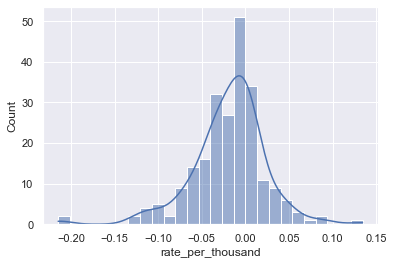

In [83]:
sns.histplot(x=growth_rate, kde=True)

The plot seems to suggest that depression rate seems to go down in the recent 10 years. We will next explore the growth from 1996 to 2006, to see whether the trend was different.

<AxesSubplot:xlabel='rate_per_thousand', ylabel='Count'>

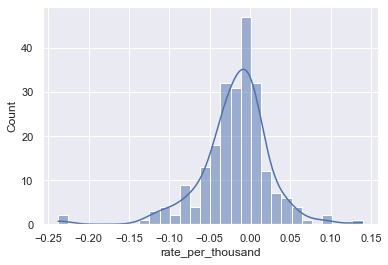

In [85]:
growth_2 = df_plot[df_plot["Year"]==2006].reset_index()["rate_per_thousand"]-df_plot[df_plot["Year"]==1996].reset_index()["rate_per_thousand"]
growth_rate_2 = growth / df_plot[df_plot["Year"]==1996].reset_index()["rate_per_thousand"]
sns.histplot(x=growth_rate_2, kde=True)

A similar trend of more decrease than increase seems to show for the previous 10 years as well, despite the site suggest an overall increase world wide (https://ourworldindata.org/grapher/number-of-people-with-depression?country=~OWID_WRL). This phenomenon can be attributed to some very populous countries are encountering more depressive patients, whereas more countries with smaller population may be receiving less depressive patients

Another interesting dataset is the data about world population, which may provide additional insights when combined with other datasets. Its exploration & cleaning process is as below:

In [18]:
df_population = pd.read_csv("world_population.csv")
df_income_groups = pd.read_csv("income_groups.csv")

In [19]:
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [20]:
df_population.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2017                2
2018                2
2019                2
2020                2
Unnamed: 65       266
Length: 66, dtype: int64

In [21]:
df_population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [22]:
df_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [23]:
# drop useless columns
df_population = df_population.drop(columns=["Indicator Name", "Indicator Code", "Unnamed: 65"])
df_population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [24]:
df_income_groups.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [25]:
df_income_groups["Country Name"] = df_income_groups["TableName"] 
df_income_groups.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,Country Name
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN,Angola


In [26]:
df_income_groups.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5', 'Country Name'],
      dtype='object')

In [27]:
# drop useless columns
df_income_groups = df_income_groups.drop(columns=["TableName", "Unnamed: 5", "SpecialNotes"])
df_income_groups.head()

,Country Code,Region,IncomeGroup,Country Name
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFE,NaN,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Afghanistan
3,AFW,NaN,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,Angola


In [31]:
df_population_cleaned = pd.merge(df_population, 
                                 df_income_groups, 
                                 on=["Country Code", "Country Name"],
                                 how="inner")
df_population_cleaned.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,South Asia,Low income
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,Sub-Saharan Africa,Lower middle income


In [32]:
df_population_cleaned.isna().sum()

Country Name     0
Country Code     0
1960             1
1961             1
1962             1
                ..
2018             1
2019             1
2020             1
Region          43
IncomeGroup     44
Length: 65, dtype: int64

In [35]:
df_population_cleaned[df_population_cleaned["2020"].isna()]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
67,Eritrea,ERI,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,1178875.0,1210304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income


In [36]:
df_population_cleaned.dtypes

Country Name     object
Country Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2018            float64
2019            float64
2020            float64
Region           object
IncomeGroup      object
Length: 65, dtype: object

In [39]:
# clean columns with nan
years = [str(year) for year in range(1960, 2020+1)]
df_population_cleaned[years] = df_population_cleaned[years].fillna(0.0)
df_population_cleaned[["Region", "IncomeGroup"]] = df_population_cleaned[["Region", "IncomeGroup"]].fillna("")
df_population_cleaned.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
               ..
2018            0
2019            0
2020            0
Region          0
IncomeGroup     0
Length: 65, dtype: int64

In [43]:
df_population_cleaned.to_csv("cleaned_population.csv", index=False)